In [5]:
import os
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Import data
df = pd.read_csv("../DAP2/processeddata/2018_Financial_Data.csv", index_col=0)
X = df.drop(columns="Class")
y = df["Class"]

# Decision Trees, Entropy

Highest Accuracy (no-reg): 0.7652811735941321 at k = 3
Highest Accuracy (reg): 0.7652811735941321 at k = 3


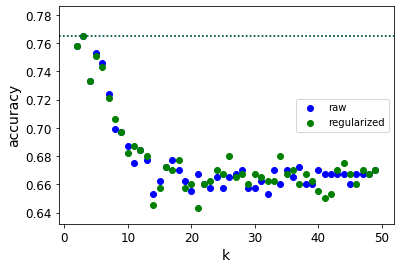

In [47]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

depth_range = range(2, 50)
scores = []
reg_scores = []

for depth in depth_range:
    tree_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    tree_entropy.fit(X_train, y_train)
    
    scores.append(tree_entropy.score(X_test, y_test))
    
    tree_entropy.fit(X_train_scaled, y_train)
    reg_scores.append(tree_entropy.score(X_test_scaled, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(depth_range, scores, c='b')
plt.scatter(depth_range, reg_scores, c='g')
plt.legend(['raw', 'regularized'])
m = max(scores)
mR = max(reg_scores)
m_index = scores.index(m)+2
m_indexR = reg_scores.index(mR)+2
plt.axhline(y=m, color='b', linestyle=':')
plt.axhline(y=mR, color='g', linestyle=':')
print('Highest Accuracy (no-reg):',m,'at k =',m_index)
print('Highest Accuracy (reg):',mR,'at k =',m_indexR)

# Decision Tree, Gini

Highest Accuracy (no-reg): 0.78239608801956 at k = 2
Highest Accuracy (reg): 0.78239608801956 at k = 2


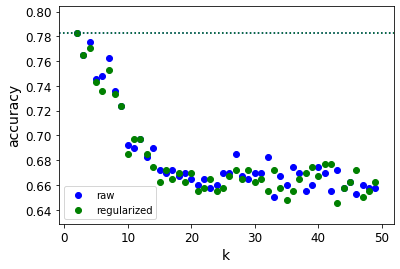

In [46]:
scores = []
reg_scores = []

for depth in depth_range:
    tree_entropy = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    tree_entropy.fit(X_train, y_train)
    
    scores.append(tree_entropy.score(X_test, y_test))
    
    tree_entropy.fit(X_train_scaled, y_train)
    reg_scores.append(tree_entropy.score(X_test_scaled, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(depth_range, scores, c='b')
plt.scatter(depth_range, reg_scores, c='g')
plt.legend(['raw', 'regularized'])
m = max(scores)
mR = max(reg_scores)
m_index = scores.index(m)+2
m_indexR = reg_scores.index(mR)+2
plt.axhline(y=m, color='b', linestyle=':')
plt.axhline(y=mR, color='g', linestyle=':')
print('Highest Accuracy (no-reg):',m,'at k =',m_index)
print('Highest Accuracy (reg):',mR,'at k =',m_indexR)